# Tabular data - Titanic

In [1]:
from fastai.tabular import *

In [2]:
train_df = pd.read_csv("/home/jupyter/train.csv")
test_df = pd.read_csv("/home/jupyter/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
cat_names = ['Pclass','Sex', 'Title', 'SibSp', 'Parch','Embarked','Cabin']
cont_names = ['Age', 'Fare']

In [5]:
Title_Dictionary = {
   "Capt": "Officer",
   "Col": "Officer",
   "Major": "Officer",
   "Jonkheer": "Royalty",
   "Don": "Royalty",
   "Sir" : "Royalty",
   "Dr": "Officer",
   "Rev": "Officer",
   "the Countess":"Royalty",
   "Mme": "Mrs",
   "Mlle": "Miss",
   "Ms": "Mrs",
   "Mr" : "Mr",
   "Mrs" : "Mrs",
   "Miss" : "Miss",
   "Master" : "Master",
   "Lady" : "Royalty",
   "Dona":"Dona",
}

In [6]:
# creating the title column

train_df['Title'] = train_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

train_df['Title'] = train_df.Title.map(Title_Dictionary)
test_df['Title'] = test_df.Title.map(Title_Dictionary)

In [30]:
train_df['Cabin'] = train_df.Cabin.fillna("N")
test_df['Cabin'] = test_df.Cabin.fillna("N")

In [8]:
test_df.Age = test_df.Age.fillna(test_df.groupby(['Sex','Pclass','Title']).Age.transform(lambda x: x.fillna(x.median())))
train_df.Age = train_df.Age.fillna(train_df.groupby(['Sex','Pclass','Title']).Age.transform(lambda x: x.fillna(x.median())))

In [9]:
train_df['Fare'] = train_df.Fare.fillna(train_df.Fare.median())
test_df['Fare'] = test_df.Fare.fillna(test_df.Fare.median())

In [10]:
train_df['Embarked'] = train_df.Embarked.fillna('S')
test_df['Embarked'] = test_df.Embarked.fillna('S')

In [11]:
categorify = Categorify(cat_names, cont_names)
categorify(train_df)
categorify(test_df, test=True)

In [12]:
fill_missing = FillMissing(cat_names, cont_names)
fill_missing(train_df)
fill_missing(test_df, test=True)

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr


In [14]:
procs = [Categorify, FillMissing, Normalize]
dep_var = 'Survived'

In [15]:
test = TabularList.from_df(test_df, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [16]:
data = (TabularList.from_df(train_df, procs=procs, cont_names=cont_names, cat_names=cat_names)
        .split_by_rand_pct().label_from_df(cols=dep_var).add_test(test).databunch())

In [17]:
data.show_batch(rows=10)

Pclass,Sex,Title,SibSp,Parch,Embarked,Cabin,Age,Fare,target
1,male,Mr,0,0,S,N,0.7767,-0.1146,0
3,male,Mr,0,0,S,N,-0.0987,-0.4736,0
1,female,Miss,0,0,C,E36,0.0472,0.5029,1
1,female,Miss,0,0,C,C90,-0.3905,0.3550,1
3,female,Miss,1,1,S,N,-2.0682,-0.4091,1
2,female,Miss,0,0,S,E101,-0.1716,-0.4217,1
1,female,Miss,1,1,C,E49,0.7037,1.0252,1
3,male,Mr,1,0,Q,N,-0.2446,-0.4765,0
3,male,Mr,0,0,S,N,-0.6093,-0.4705,0
2,male,Mr,1,0,S,N,0.5578,-0.1131,0


In [18]:
data.show_batch(rows=10, ds_type=DatasetType.Valid)

Pclass,Sex,Title,SibSp,Parch,Embarked,Cabin,Age,Fare,target
3,male,Mr,0,0,S,N,-0.6093,-0.4583,0
1,male,Mr,0,0,S,C110,1.2873,0.4047,0
3,female,Mrs,0,3,C,N,-0.3905,-0.2473,1
1,male,Mr,0,0,S,D6,-0.0257,-0.0334,0
1,female,Miss,0,1,S,B5,-1.0470,3.5777,1
3,female,Miss,0,0,Q,N,-0.8282,-0.4765,1
2,female,Mrs,1,1,S,N,-0.5364,-0.0533,1
3,male,Mr,0,0,S,N,-0.3905,-0.4904,0
3,male,Mr,0,0,S,N,-0.2446,-0.4736,0
1,female,Miss,0,0,C,C45,0.6308,3.9001,1


In [25]:
learn = tabular_learner(data, layers=[200, 100], metrics=accuracy)

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


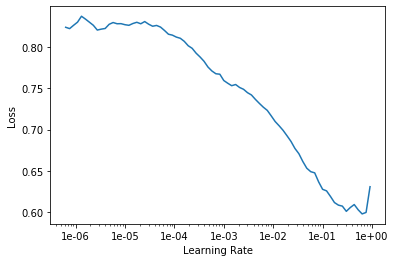

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(8, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.711371,0.670244,0.623595,00:00
1,0.605979,0.612638,0.606742,00:00
2,0.510399,0.516346,0.764045,00:00
3,0.461769,0.434693,0.870786,00:00
4,0.423265,0.459927,0.758427,00:00
5,0.391740,0.410035,0.820225,00:00
6,0.367530,0.426408,0.820225,00:00
7,0.347720,0.428595,0.820225,00:00


In [28]:
train_df[train_df.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [31]:
test_df[test_df.isna().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
342,1234,3,"Sage, Mr. John George",male,25.0,1,NaN,CA. 2343,69.55,N,S,Mr
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,28.0,1,NaN,CA. 2343,69.55,N,S,Mrs
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,N,C,NaN
